# Credit Card Fraud Detection

This notebook performs credit card fraud detection using both traditional
Machine Learning (ML) and Deep Learning (DL) models. We will:

- Load and preprocess the dataset.

- Train several ML models including Decision Tree, K-Nearest Neighbors, Logistic
  Regression, Support Vector Machine, Random Forest, and XGBoost.

- Build several DL models (baseline dense network and various CNN
  architectures).

- Evaluate the models with metrics and confusion matrices.

- Provide additional visualizations (class distribution, correlation heatmap,
  feature importance, ROC curves) for a compelling presentation.

- Balance the dataset and retrain a DL model on the balanced data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    auc,
)

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Conv1D, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

import warnings

warnings.filterwarnings("ignore")

## Data Loading and Preprocessing

We read the dataset from `dataset.csv`, encode categorical columns using
`LabelEncoder`, and then split into training and test sets. Finally, we
standardize the numerical columns.


In [2]:
df = pd.read_csv("dataset.csv")

categorical_cols = [
    "over_draft",
    "credit_history",
    "purpose",
    "Average_Credit_Balance",
    "employment",
    "personal_status",
    "other_parties",
    "property_magnitude",
    "other_payment_plans",
    "housing",
    "job",
    "own_telephone",
    "foreign_worker",
    "class",
]
#
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


X = df.drop("class", axis=1)
y = df["class"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


numerical_cols = [
    "credit_usage",
    "current_balance",
    "location",
    "residence_since",
    "cc_age",
    "existing_credits",
    "num_dependents",
]
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

## Machine Learning Models

In this section, we train and evaluate several ML models:

- **Decision Tree**

- **K-Nearest Neighbors (KNN)**

- **Logistic Regression** (using hyperparameter tuning with
  `RandomizedSearchCV`)

- **Support Vector Machine (SVM)**

- **Random Forest**

- **XGBoost**


In [3]:
# ----- Decision Tree -----
print("\n----- Decision Tree -----")
dt_model = DecisionTreeClassifier(max_depth=4, criterion="entropy", random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds, average="weighted")
dt_recall = recall_score(y_test, dt_preds, average="weighted")
dt_f1 = f1_score(y_test, dt_preds, average="weighted")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}")

# ----- K-Nearest Neighbors -----
print("\n----- K-Nearest Neighbors -----")
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_preds = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_preds)
knn_precision = precision_score(y_test, knn_preds, average="weighted")
knn_recall = recall_score(y_test, knn_preds, average="weighted")
knn_f1 = f1_score(y_test, knn_preds, average="weighted")
print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1 Score: {knn_f1:.4f}")

# ----- Logistic Regression -----
print("\n----- Logistic Regression -----")
param_grid = {"C": np.logspace(-4, 4, 20)}
lr_search = RandomizedSearchCV(
    LogisticRegression(max_iter=1000), param_grid, cv=5, random_state=42
)
lr_search.fit(X_train, y_train)
lr_model = lr_search.best_estimator_
lr_preds = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_precision = precision_score(y_test, lr_preds, average="weighted")
lr_recall = recall_score(y_test, lr_preds, average="weighted")
lr_f1 = f1_score(y_test, lr_preds, average="weighted")
print(f"Best C: {lr_search.best_params_['C']}")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision: {lr_precision:.4f}")
print(f"Recall: {lr_recall:.4f}")
print(f"F1 Score: {lr_f1:.4f}")

# ----- Support Vector Machine -----
print("\n----- Support Vector Machine -----")
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_preds)
svm_precision = precision_score(y_test, svm_preds, average="weighted")
svm_recall = recall_score(y_test, svm_preds, average="weighted")
svm_f1 = f1_score(y_test, svm_preds, average="weighted")
print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision: {svm_precision:.4f}")
print(f"Recall: {svm_recall:.4f}")
print(f"F1 Score: {svm_f1:.4f}")

# ----- Random Forest -----
print("\n----- Random Forest -----")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds, average="weighted")
rf_recall = recall_score(y_test, rf_preds, average="weighted")
rf_f1 = f1_score(y_test, rf_preds, average="weighted")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1 Score: {rf_f1:.4f}")

# ----- XGBoost -----
print("\n----- XGBoost -----")
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_precision = precision_score(y_test, xgb_preds, average="weighted")
xgb_recall = recall_score(y_test, xgb_preds, average="weighted")
xgb_f1 = f1_score(y_test, xgb_preds, average="weighted")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1 Score: {xgb_f1:.4f}")


----- Decision Tree -----
Accuracy: 0.7400
Precision: 0.7247
Recall: 0.7400
F1 Score: 0.7270

----- K-Nearest Neighbors -----
Accuracy: 0.6850
Precision: 0.6450
Recall: 0.6850
F1 Score: 0.6496

----- Logistic Regression -----
Best C: 0.012742749857031334
Accuracy: 0.6800
Precision: 0.6298
Recall: 0.6800
F1 Score: 0.6341

----- Support Vector Machine -----
Accuracy: 0.7100
Precision: 0.6765
Recall: 0.7100
F1 Score: 0.6684

----- Random Forest -----
Accuracy: 0.7450
Precision: 0.7276
Recall: 0.7450
F1 Score: 0.7244

----- XGBoost -----
Accuracy: 0.7350
Precision: 0.7250
Recall: 0.7350
F1 Score: 0.7284


## Confusion Matrices for Machine Learning Models

The following plots show the confusion matrices for each ML model.


In [4]:
plt.figure(figsize=(20, 15))
models = [
    ("Decision Tree", dt_preds),
    ("KNN", knn_preds),
    ("Logistic Regression", lr_preds),
    ("SVM", svm_preds),
    ("Random Forest", rf_preds),
    ("XGBoost", xgb_preds),
]
for i, (name, preds) in enumerate(models):
    plt.subplot(2, 3, i + 1)
    cm = confusion_matrix(y_test, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix of {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
plt.tight_layout()
plt.savefig("ml_confusion_matrices.png")
plt.close()

## Machine Learning Models Comparison

We compile the performance metrics for each ML model and create bar plots to
compare accuracy and F1 Score.



----- Machine Learning Models Comparison -----
                 Model  Accuracy  Precision  Recall  F1 Score
4        Random Forest     0.745   0.727591   0.745  0.724446
0        Decision Tree     0.740   0.724709   0.740  0.727027
5              XGBoost     0.735   0.724951   0.735  0.728383
3                  SVM     0.710   0.676481   0.710  0.668375
1                  KNN     0.685   0.644951   0.685  0.649589
2  Logistic Regression     0.680   0.629797   0.680  0.634069


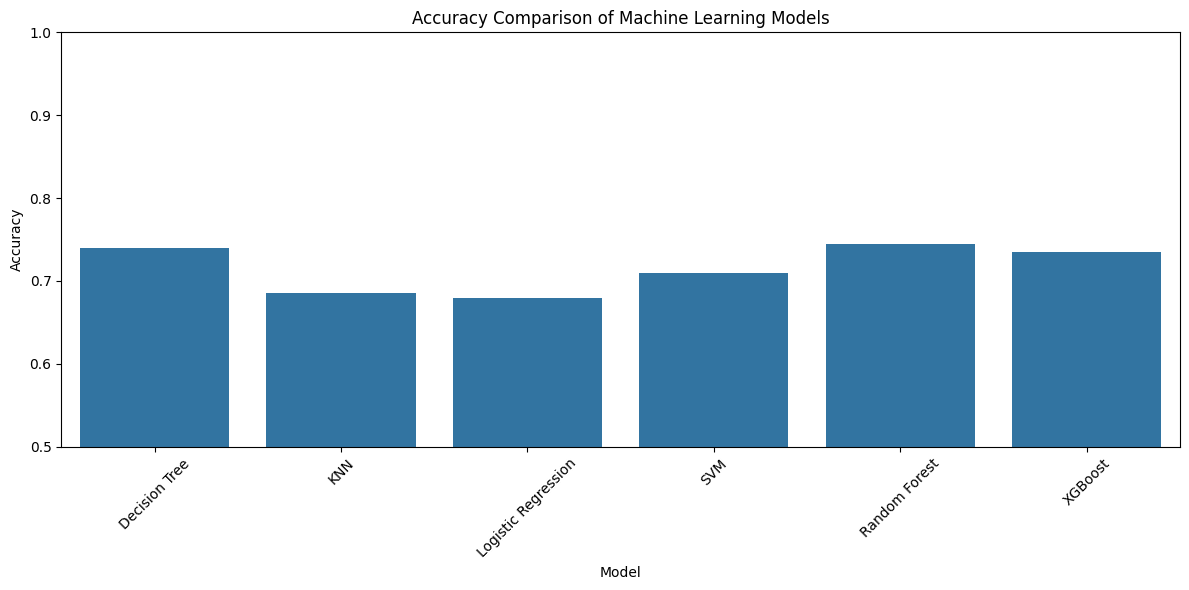

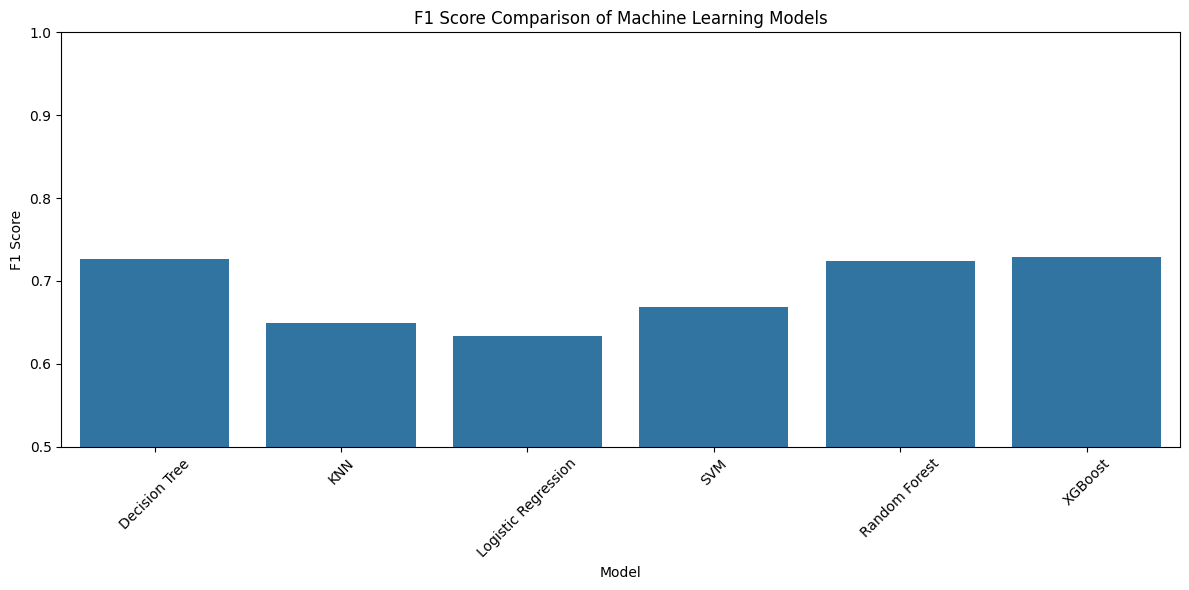

In [5]:
ml_results = pd.DataFrame(
    {
        "Model": [
            "Decision Tree",
            "KNN",
            "Logistic Regression",
            "SVM",
            "Random Forest",
            "XGBoost",
        ],
        "Accuracy": [
            dt_accuracy,
            knn_accuracy,
            lr_accuracy,
            svm_accuracy,
            rf_accuracy,
            xgb_accuracy,
        ],
        "Precision": [
            dt_precision,
            knn_precision,
            lr_precision,
            svm_precision,
            rf_precision,
            xgb_precision,
        ],
        "Recall": [dt_recall, knn_recall, lr_recall, svm_recall, rf_recall, xgb_recall],
        "F1 Score": [dt_f1, knn_f1, lr_f1, svm_f1, rf_f1, xgb_f1],
    }
)
print("\n----- Machine Learning Models Comparison -----")
print(ml_results.sort_values(by="Accuracy", ascending=False))

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=ml_results)
plt.title("Accuracy Comparison of Machine Learning Models")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="F1 Score", data=ml_results)
plt.title("F1 Score Comparison of Machine Learning Models")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.close()

## Deep Learning Models

We now build several deep learning models:

- A Baseline fully-connected model.

- CNN models with 11, 14, 17, and 20 layers.

Each model is trained with early stopping, and training history as well as
evaluation metrics are saved.


In [6]:
# Convert training and test sets to NumPy arrays
X_train_array = X_train.values
X_test_array = X_test.values
y_train_array = y_train.values
y_test_array = y_test.values


# Baseline model architecture
def create_baseline_model(input_dim):
    model = Sequential(
        [
            Dense(16, activation="relu", input_shape=(input_dim,)),
            Dropout(0.2),
            Dense(16, activation="relu"),
            Dropout(0.2),
            Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


# CNN with 11 layers
def create_cnn_11_layers(input_dim):
    model = Sequential(
        [
            tf.keras.layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
            Conv1D(32, 2, activation="relu"),
            BatchNormalization(),
            Dropout(0.2),
            Conv1D(64, 2, activation="relu"),
            BatchNormalization(),
            Dropout(0.5),
            Flatten(),
            Dense(64, activation="relu"),
            Dropout(0.5),
            Dense(32, activation="relu"),
            Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


# CNN with 14 layers
def create_cnn_14_layers(input_dim):
    model = Sequential(
        [
            tf.keras.layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
            Conv1D(32, 2, activation="relu"),
            BatchNormalization(),
            Dropout(0.2),
            Conv1D(64, 2, activation="relu"),
            BatchNormalization(),
            Dropout(0.5),
            Flatten(),
            Dense(64, activation="relu"),
            Dropout(0.5),
            Dense(100, activation="relu"),
            Dense(50, activation="relu"),
            Dense(25, activation="relu"),
            Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


# CNN with 17 layers
def create_cnn_17_layers(input_dim):
    model = Sequential(
        [
            tf.keras.layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
            Conv1D(32, 2, activation="relu"),
            BatchNormalization(),
            Dropout(0.2),
            Conv1D(64, 2, activation="relu"),
            BatchNormalization(),
            Dropout(0.5),
            Conv1D(64, 2, activation="relu"),
            BatchNormalization(),
            Dropout(0.25),
            Flatten(),
            Dense(64, activation="relu"),
            Dropout(0.5),
            Dense(100, activation="relu"),
            Dense(50, activation="relu"),
            Dense(25, activation="relu"),
            Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


# CNN with 20 layers
def create_cnn_20_layers(input_dim):
    model = Sequential(
        [
            tf.keras.layers.Reshape((input_dim, 1), input_shape=(input_dim,)),
            Conv1D(32, 2, activation="relu"),
            BatchNormalization(),
            Dropout(0.2),
            Conv1D(64, 2, activation="relu"),
            BatchNormalization(),
            Dropout(0.5),
            Conv1D(64, 2, activation="relu"),
            BatchNormalization(),
            Dropout(0.5),
            Conv1D(64, 2, activation="relu"),
            BatchNormalization(),
            Dropout(0.25),
            Flatten(),
            Dense(64, activation="relu"),
            Dropout(0.5),
            Dense(100, activation="relu"),
            Dense(50, activation="relu"),
            Dense(25, activation="relu"),
            Dense(1, activation="sigmoid"),
        ]
    )
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss="binary_crossentropy",
        metrics=["accuracy"],
    )
    return model


# Set training parameters and early stopping callback
epochs = 100
batch_size = 32
early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

In [7]:
# Dictionary of deep learning models
input_dim = X_train_array.shape[1]
dl_models = {
    "Baseline (5 layers)": create_baseline_model(input_dim),
    "CNN (11 layers)": create_cnn_11_layers(input_dim),
    "CNN (14 layers)": create_cnn_14_layers(input_dim),
    "CNN (17 layers)": create_cnn_17_layers(input_dim),
    "CNN (20 layers)": create_cnn_20_layers(input_dim),
}

dl_results = []
for name, model in dl_models.items():
    print(f"\n----- Training {name} -----")
    history = model.fit(
        X_train_array,
        y_train_array,
        validation_split=0.2,
        epochs=epochs,
        batch_size=batch_size,
        callbacks=[early_stopping],
        verbose=1,
    )

    # Plot training history (accuracy & loss)
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train")
    plt.plot(history.history["val_accuracy"], label="Validation")
    plt.title(f"{name} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train")
    plt.plot(history.history["val_loss"], label="Validation")
    plt.title(f"{name} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'{name.replace(" ", "_").lower()}_training.png')
    plt.close()

    # Evaluate the model on the test set
    loss, accuracy = model.evaluate(X_test_array, y_test_array, verbose=0)
    y_pred_prob = model.predict(X_test_array, verbose=0)
    y_pred = (y_pred_prob > 0.5).astype(int).flatten()

    precision = precision_score(y_test_array, y_pred, average="weighted")
    recall = recall_score(y_test_array, y_pred, average="weighted")
    f1 = f1_score(y_test_array, y_pred, average="weighted")

    try:
        roc_auc = roc_auc_score(y_test_array, y_pred_prob)
    except Exception as e:
        roc_auc = None

    try:
        precision_curve, recall_curve, _ = precision_recall_curve(
            y_test_array, y_pred_prob
        )
        pr_auc = auc(recall_curve, precision_curve)
    except Exception as e:
        pr_auc = None

    # Plot confusion matrix for the model
    cm = confusion_matrix(y_test_array, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f'{name.replace(" ", "_").lower()}_confusion_matrix.png')
    plt.close()

    dl_results.append(
        {
            "Model": name,
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc,
            "PR AUC": pr_auc,
        }
    )

    print(f"{name} - Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    if roc_auc is not None:
        print(f"ROC AUC: {roc_auc:.4f}")
    if pr_auc is not None:
        print(f"PR AUC: {pr_auc:.4f}")


----- Training Baseline (5 layers) -----
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5983 - loss: 0.6661 - val_accuracy: 0.6500 - val_loss: 0.6270
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6389 - loss: 0.6308 - val_accuracy: 0.6625 - val_loss: 0.6157
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6493 - loss: 0.6444 - val_accuracy: 0.6625 - val_loss: 0.6070
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6748 - loss: 0.6219 - val_accuracy: 0.6625 - val_loss: 0.6027
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6943 - loss: 0.5708 - val_accuracy: 0.6625 - val_loss: 0.5996
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6990 - loss: 0.5903 - val_accuracy: 0.6625 - val_loss: 0.5949
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6692 - loss: 0.6273 - val_accuracy: 0.6562 - val_loss: 0.5931
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.707

CNN (14 layers) - Test Accuracy: 0.7400
Precision: 0.7276
Recall: 0.7400
F1 Score: 0.7309
ROC AUC: 0.7369
PR AUC: 0.8427

----- Training CNN (17 layers) -----
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - accuracy: 0.6011 - loss: 0.6960 - val_accuracy: 0.6625 - val_loss: 0.6732
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6854 - loss: 0.6053 - val_accuracy: 0.6625 - val_loss: 0.6595
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7067 - loss: 0.5971 - val_accuracy: 0.6625 - val_loss: 0.6621
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7241 - loss: 0.5936 - val_accuracy: 0.6625 - val_loss: 0.6570
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7146 - loss: 0.5756 - val_accuracy: 0.6625 - val_loss: 0.6608
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7272 - loss: 0.5518 - val_accuracy: 0.6625 - val_loss: 0.6492
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7125 - 

CNN (17 layers) - Test Accuracy: 0.7300
Precision: 0.7168
Recall: 0.7300
F1 Score: 0.7205
ROC AUC: 0.7410
PR AUC: 0.8579

----- Training CNN (20 layers) -----
Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 56ms/step - accuracy: 0.6974 - loss: 0.6243 - val_accuracy: 0.6625 - val_loss: 0.6836
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7237 - loss: 0.5776 - val_accuracy: 0.6625 - val_loss: 0.6810
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7159 - loss: 0.6006 - val_accuracy: 0.6625 - val_loss: 0.6758
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7244 - loss: 0.5817 - val_accuracy: 0.6625 - val_loss: 0.6761
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6948 - loss: 0.6156 - val_accuracy: 0.6625 - val_loss: 0.6739
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.7246 - loss: 0.5973 - val_accuracy: 0.6625 - val_loss: 0.6714
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6911 - 

## Deep Learning Models Comparison

Next, we summarize and compare the performance of our deep learning models.


In [8]:
dl_results_df = pd.DataFrame(dl_results)
print("\n----- Deep Learning Models Comparison -----")
print(dl_results_df.sort_values(by="Accuracy", ascending=False))

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=dl_results_df)
plt.title("Accuracy Comparison of Deep Learning Models")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("dl_accuracy_comparison.png")
plt.close()

plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="F1 Score", data=dl_results_df)
plt.title("F1 Score Comparison of Deep Learning Models")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("dl_f1_comparison.png")
plt.close()


----- Deep Learning Models Comparison -----
                 Model  Accuracy  Precision  Recall  F1 Score   ROC AUC  \
2      CNN (14 layers)     0.740   0.727632   0.740  0.730898  0.736905   
4      CNN (20 layers)     0.740   0.735317   0.740  0.737348  0.739524   
3      CNN (17 layers)     0.730   0.716776   0.730  0.720548  0.740952   
0  Baseline (5 layers)     0.705   0.668000   0.705  0.660654  0.720476   
1      CNN (11 layers)     0.705   0.674306   0.705  0.675150  0.713929   

     PR AUC  
2  0.842736  
4  0.858648  
3  0.857899  
0  0.860896  
1  0.829976  


## Additional Visualizations for Presentation

The following visualizations are provided to enhance the presentation:

1.  **Class Distribution:** Count of samples in each class.

2.  **Correlation Heatmap:** Correlation among all features.

3.  **Feature Importance (Random Forest):** Importance of each feature as
    determined by the Random Forest model.

4.  **ROC Curves:** ROC curves for selected ML models.


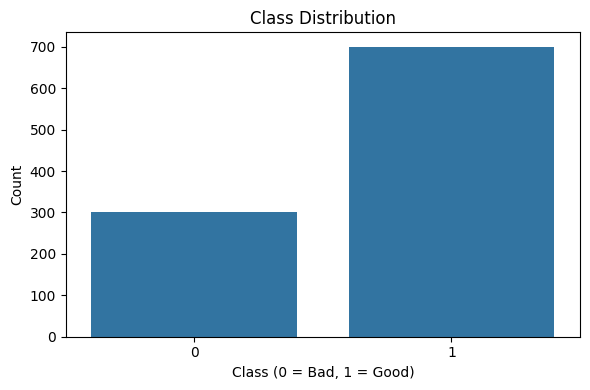

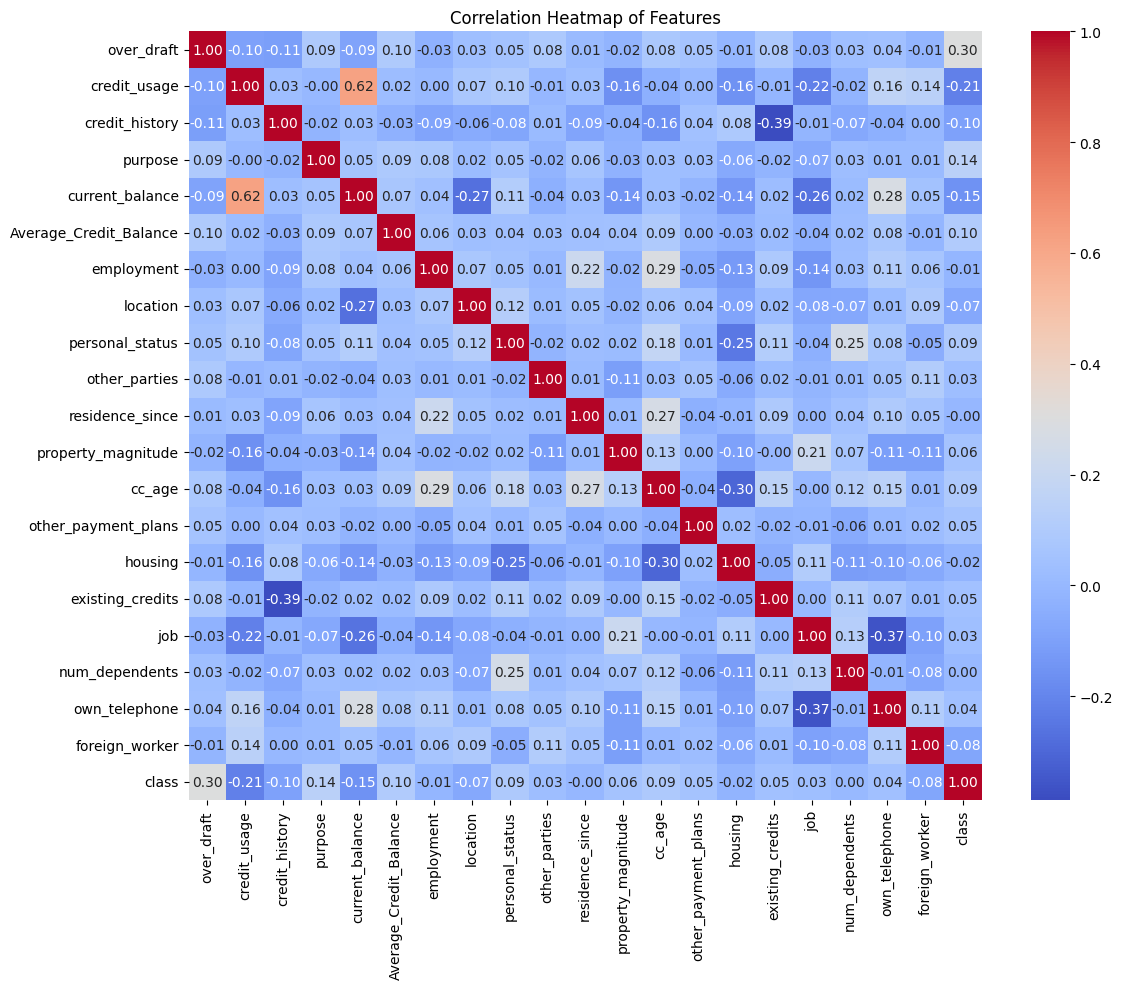

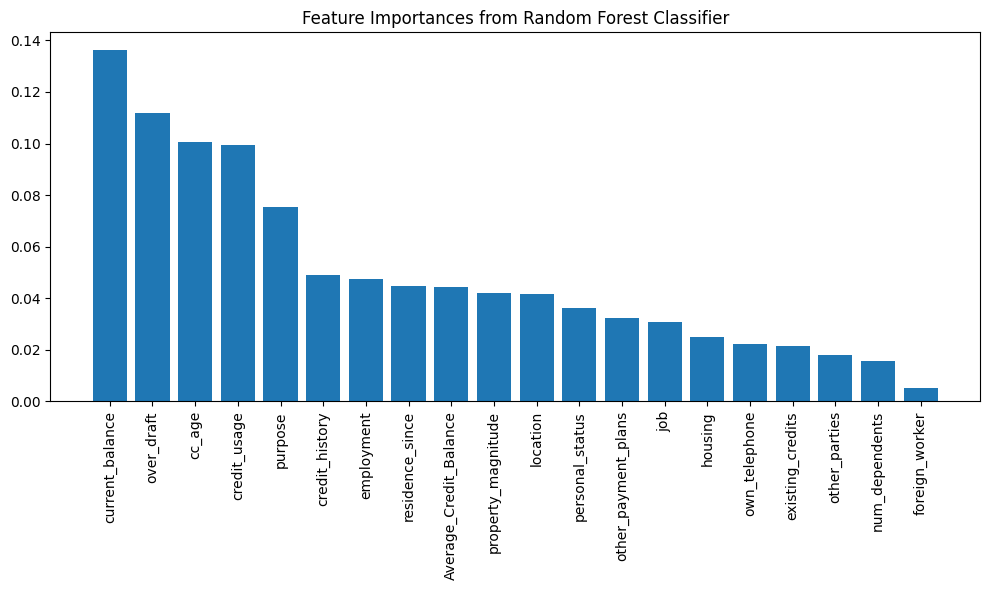

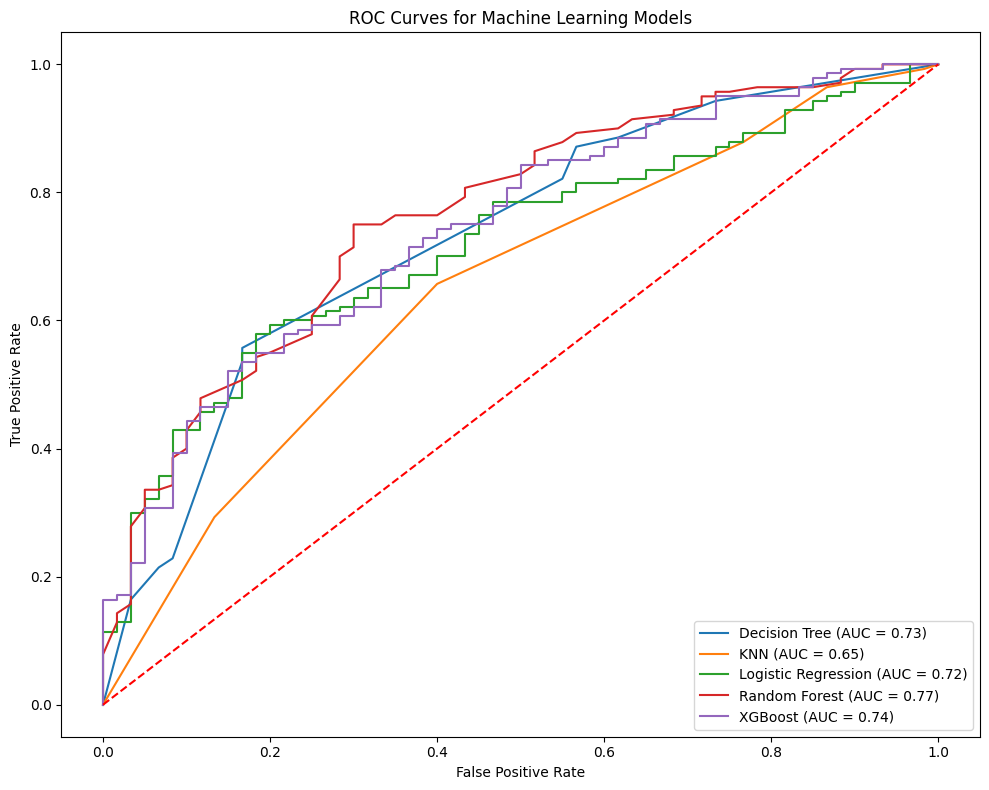

In [9]:
# 1. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["class"])
plt.title("Class Distribution")
plt.xlabel("Class (0 = Bad, 1 = Good)")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("class_distribution.png")
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.tight_layout()
plt.savefig("correlation_heatmap.png")
plt.show()

# 3. Feature Importance from Random Forest
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), X.columns[indices], rotation=90)
plt.title("Feature Importances from Random Forest Classifier")
plt.tight_layout()
plt.savefig("rf_feature_importances.png")
plt.show()

# 4. ROC Curves for Selected ML Models (those supporting predict_proba)
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
models_for_roc = {
    "Decision Tree": dt_model,
    "KNN": knn_model,
    "Logistic Regression": lr_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
}

for name, model in models_for_roc.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        continue
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "r--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Machine Learning Models")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("roc_curves_ml_models.png")
plt.show()

## Training on a Balanced Dataset

To address class imbalance, we balance the dataset by sampling an equal number
of good and bad samples. Then, we retrain the CNN (14 layers) model on the
balanced training set.


In [10]:
# Balance the dataset
good_samples = df[df["class"] == 1]
bad_samples = df[df["class"] == 0]
min_class_count = min(len(good_samples), len(bad_samples))
if len(good_samples) > len(bad_samples):
    good_samples = good_samples.sample(min_class_count, random_state=42)
else:
    bad_samples = bad_samples.sample(min_class_count, random_state=42)

balanced_df = pd.concat([good_samples, bad_samples])

X_balanced = balanced_df.drop("class", axis=1)
y_balanced = balanced_df["class"]
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

# Scale numerical columns for balanced data
X_train_bal[numerical_cols] = scaler.transform(X_train_bal[numerical_cols])
X_test_bal[numerical_cols] = scaler.transform(X_test_bal[numerical_cols])

X_train_bal_array = X_train_bal.values
X_test_bal_array = X_test_bal.values
y_train_bal_array = y_train_bal.values
y_test_bal_array = y_test_bal.values

print("\n----- Training CNN (14 layers) on Balanced Dataset -----")
balanced_cnn = create_cnn_14_layers(X_train_bal_array.shape[1])
balanced_history = balanced_cnn.fit(
    X_train_bal_array,
    y_train_bal_array,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1,
)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(balanced_history.history["accuracy"], label="Train")
plt.plot(balanced_history.history["val_accuracy"], label="Validation")
plt.title("CNN (14 layers) on Balanced Dataset - Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(balanced_history.history["loss"], label="Train")
plt.plot(balanced_history.history["val_loss"], label="Validation")
plt.title("CNN (14 layers) on Balanced Dataset - Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.tight_layout()
plt.savefig("cnn_14_balanced_training.png")
plt.close()

bal_loss, bal_accuracy = balanced_cnn.evaluate(
    X_test_bal_array, y_test_bal_array, verbose=0
)

bal_y_pred_prob = balanced_cnn.predict(X_test_bal_array, verbose=0)
bal_y_pred = (bal_y_pred_prob > 0.5).astype(int).flatten()
bal_precision = precision_score(y_test_bal_array, bal_y_pred, average="weighted")
bal_recall = recall_score(y_test_bal_array, bal_y_pred, average="weighted")
bal_f1 = f1_score(y_test_bal_array, bal_y_pred, average="weighted")

bal_cm = confusion_matrix(y_test_bal_array, bal_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(bal_cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - CNN (14 layers) on Balanced Dataset")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("cnn_14_balanced_confusion_matrix.png")
plt.close()

print(f"Test Accuracy on Balanced Dataset: {bal_accuracy:.4f}")
print(f"Precision on Balanced Dataset: {bal_precision:.4f}")
print(f"Recall on Balanced Dataset: {bal_recall:.4f}")
print(f"F1 Score on Balanced Dataset: {bal_f1:.4f}")


----- Training CNN (14 layers) on Balanced Dataset -----
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.5032 - loss: 0.8946 - val_accuracy: 0.5417 - val_loss: 0.6921
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5419 - loss: 0.6875 - val_accuracy: 0.5521 - val_loss: 0.6912
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5468 - loss: 0.6930 - val_accuracy: 0.6354 - val_loss: 0.6881
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5927 - loss: 0.6660 - val_accuracy: 0.5417 - val_loss: 0.6833
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5967 - loss: 0.6790 - val_accuracy: 0.5833 - val_loss: 0.6809
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5708 - loss: 0.6635 - val_accuracy: 0.6354 - val_loss: 0.6763
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6008 - loss: 0.6639 - val_accuracy: 0.6562 - val_loss: 0.6758
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms

## All Models Comparison

Finally, we combine the results from the ML models, DL models, and the balanced
DL model, and compare them side by side.


In [11]:
all_models = pd.concat(
    [
        ml_results,
        dl_results_df,
        pd.DataFrame(
            [
                {
                    "Model": "CNN (14 layers) on Balanced Dataset",
                    "Accuracy": bal_accuracy,
                    "Precision": bal_precision,
                    "Recall": bal_recall,
                    "F1 Score": bal_f1,
                }
            ]
        ),
    ]
)
print("\n----- All Models Comparison -----")
print(all_models.sort_values(by="Accuracy", ascending=False))

plt.figure(figsize=(14, 7))
sns.barplot(
    x="Model", y="Accuracy", data=all_models.sort_values(by="Accuracy", ascending=False)
)
plt.title("Accuracy Comparison of All Models")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("all_models_accuracy_comparison.png")
plt.close()

plt.figure(figsize=(14, 7))
sns.barplot(
    x="Model", y="F1 Score", data=all_models.sort_values(by="F1 Score", ascending=False)
)
plt.title("F1 Score Comparison of All Models")
plt.ylim(0.5, 1.0)
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("all_models_f1_comparison.png")
plt.close()

print("\n----- Credit Card Fraud Detection Complete -----")
print(
    "The best model based on accuracy is:",
    all_models.loc[all_models["Accuracy"].idxmax()]["Model"],
)
print(
    "The best model based on F1 Score is:",
    all_models.loc[all_models["F1 Score"].idxmax()]["Model"],
)


----- All Models Comparison -----
                                 Model  Accuracy  Precision    Recall  \
4                        Random Forest  0.745000   0.727591  0.745000   
2                      CNN (14 layers)  0.740000   0.727632  0.740000   
4                      CNN (20 layers)  0.740000   0.735317  0.740000   
0                        Decision Tree  0.740000   0.724709  0.740000   
5                              XGBoost  0.735000   0.724951  0.735000   
3                      CNN (17 layers)  0.730000   0.716776  0.730000   
0  CNN (14 layers) on Balanced Dataset  0.716667   0.716908  0.716667   
3                                  SVM  0.710000   0.676481  0.710000   
1                      CNN (11 layers)  0.705000   0.674306  0.705000   
0                  Baseline (5 layers)  0.705000   0.668000  0.705000   
1                                  KNN  0.685000   0.644951  0.685000   
2                  Logistic Regression  0.680000   0.629797  0.680000   

   F1 Score   R